In [19]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [20]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\penguin_data\cleaned_dataset_penguin.csv")

In [21]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,gender_MALE
0,0,39.1,18.7,181.0,3750.0,False,True,True
1,0,39.5,17.4,186.0,3800.0,False,True,False
2,0,40.3,18.0,195.0,3250.0,False,True,False
3,0,36.7,19.3,193.0,3450.0,False,True,False
4,0,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...,...
329,2,47.2,13.7,214.0,4925.0,False,False,False
330,2,46.8,14.3,215.0,4850.0,False,False,False
331,2,50.4,15.7,222.0,5750.0,False,False,True
332,2,45.2,14.8,212.0,5200.0,False,False,False


# X and y

In [22]:
X = df.drop(columns = ['species'])
y = df['species']

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Modelling and evaluation

**Decision Tree classifier- with default hyperparameter**

In [24]:
# modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = True)
dt_default.fit(X_train, y_train)

# Prediction
pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(pred_train, y_train))
print("Test Accuracy : ", accuracy_score(pred_test, y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(dt_default, X, y, cv=5).mean())


Train Accuracy :  1.0
Test Accuracy :  0.9253731343283582
cross_val_score :  0.9759384893713252


# visualize Tree

In [25]:
X_train.columns.tolist()

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'island_Dream',
 'island_Torgersen',
 'gender_MALE']

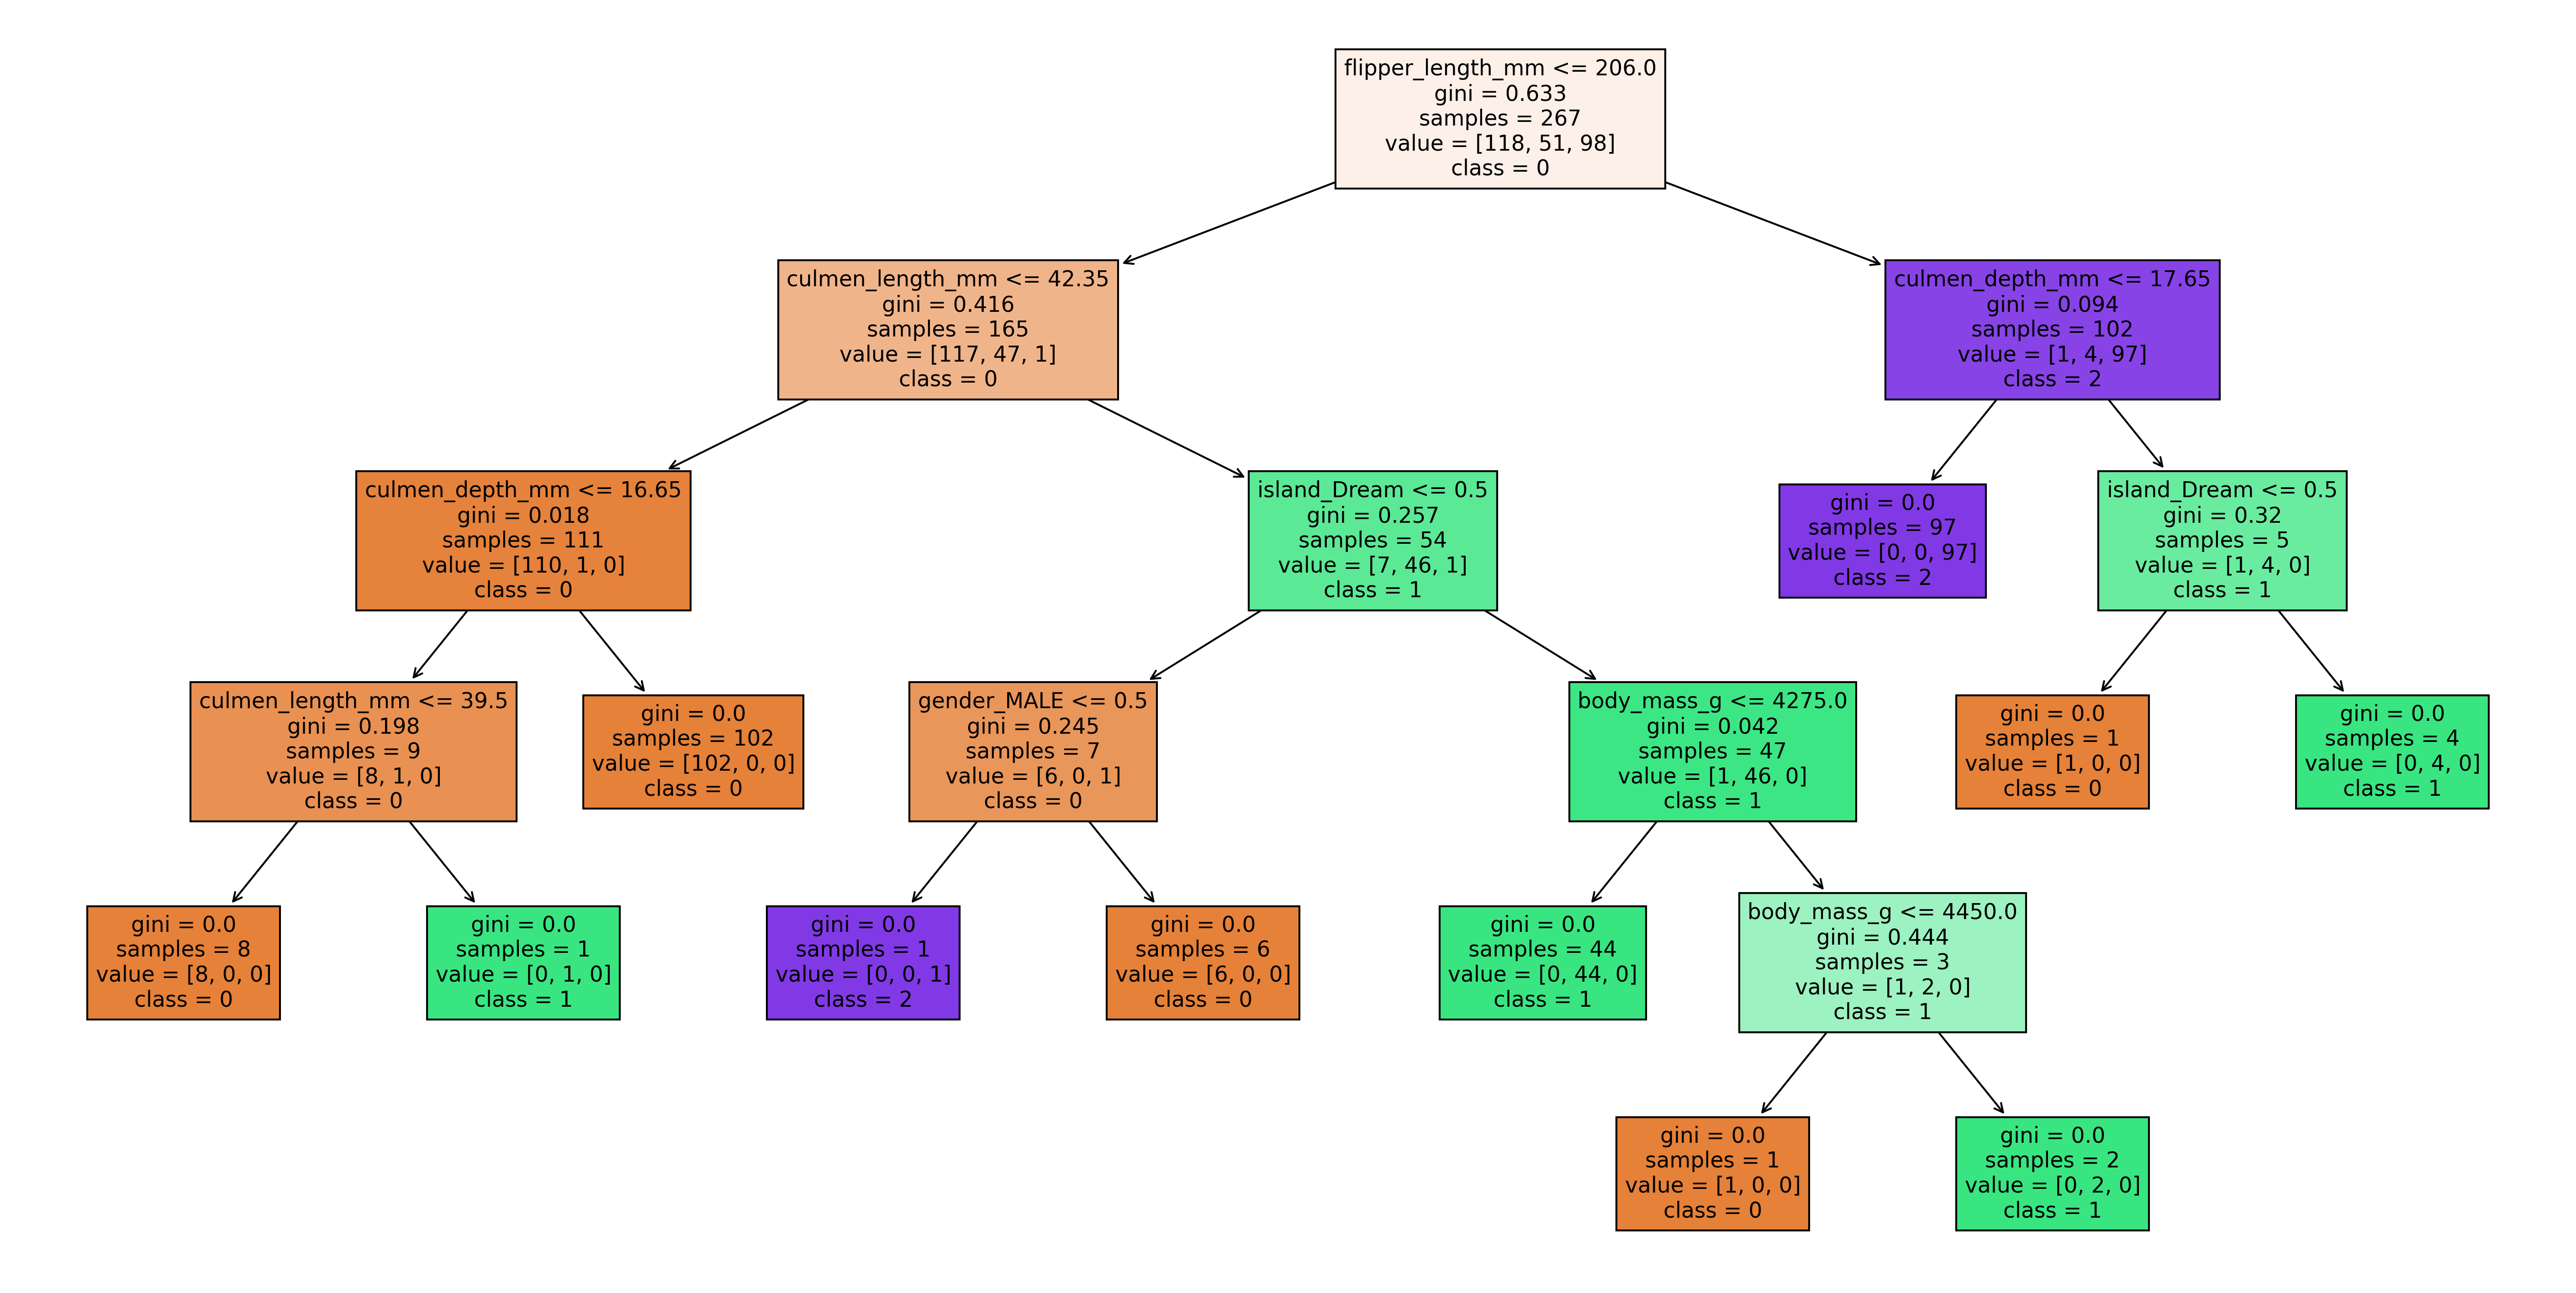

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1','2']
         )
plt.show()

In [27]:
print("Depth of the tree:", dt_default.get_depth())


Depth of the tree: 5


# HyperParameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"criterion" : ['gini', 'entropy'], 
             'max_depth' : [1,2,3,4,5]}


grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [29]:
grid.best_estimator_.feature_importances_

array([0.32238899, 0.05004879, 0.55536951, 0.        , 0.06241807,
       0.00977463, 0.        ])

In [30]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index = X.columns,
                    columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
important_features_list = feats_imp.index.to_list()
important_features_list

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'island_Dream',
 'island_Torgersen']

# Final Decision Tree model
**with best hyper parameters and imp_features**

In [31]:
# input with important features
X_imp = X[important_features_list]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = True)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print("Train Accuracy : ", accuracy_score(ypred_train, y_train))
print("Test Accuracy : ", accuracy_score(ypred_test, y_test))
print("Cross_val_score : ", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train Accuracy :  0.9887640449438202
Test Accuracy :  0.9701492537313433
Cross_val_score :  0.9640434192672999


In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[26,  2,  0],
       [ 0, 17,  0],
       [ 0,  0, 22]], dtype=int64)